# **Assignment -1 : Enhanced Dynamic Robot Movement Simulation**

**Submitted by**

      Md. Miskat Hossain
      2021-2-60-109
      Department of Computer Science & Engineering
      East West University
**Submitted to**

      Dr. Mohammad Rifat Ahmmad Rashid
      Assistant Professor
      Department of Computer Science & Engineering
      East West University

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import heapq
import random

# Node Class represents a state in the search tree.
class Node:
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.state = state  # The current position of the agent in the grid.
        self.parent = parent  # The node in the search tree that generated this node.
        self.action = action  # The action taken to get to this state.
        self.path_cost = path_cost  # Cost from the start node to this node.

    # Comparison operator for priority queue.
    def __lt__(self, other):
        return self.path_cost < other.path_cost

class PriorityQueue:
    def __init__(self):
        self.elements = []

    def empty(self):
        return len(self.elements) == 0

    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))

    def get(self):
        return heapq.heappop(self.elements)[1]

def heuristic(a, b):
    (x1, y1) = a
    (x2, y2) = b
    return abs(x1 - x2) + abs(y1 - y2)

#Environment Class

In [ ]:
# Environment Class represents the grid and handles state transitions.
class Environment:
    def __init__(self):
        probabilities = [0.9, 0.1]
        self.grid = np.random.choice([0, 1], size=(10, 10), p=probabilities)
        rn1 = random.randint(0,9)
        rn2 = random.randint(0,9)
        rn3 = random.randint(0,9)
        rn4 = random.randint(0,9)
        self.grid[rn1][rn2]=0
        self.grid[rn3][rn4]=0
        print(self.grid)  # The grid layout where 1 represents an obstacle and 0 is free space.
        self.initial = (rn1, rn2)  # Starting position of the agent.
        self.goal = (rn3, rn4)  # Goal position the agent aims to reach.
    # Returns the possible actions from a given state.
    def actions(self, state):
        possible_actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
        x, y = state
        # Remove impossible actions based on grid boundaries and obstacles.
        if x == 0 or self.grid[x - 1][y] == 1:
            possible_actions.remove('UP')
        if x == len(self.grid) - 1 or self.grid[x + 1][y] == 1:
            possible_actions.remove('DOWN')
        if y == 0 or self.grid[x][y - 1] == 1:
            possible_actions.remove('LEFT')
        if y == len(self.grid[0]) - 1 or self.grid[x][y + 1] == 1:
            possible_actions.remove('RIGHT')
        return possible_actions
    # Returns the state resulting from taking a given action at a given state.
    def result(self, state, action):
        x, y = state
        if action == 'UP':
            return (x - 1, y)
        if action == 'DOWN':
            return (x + 1, y)
        if action == 'LEFT':
            return (x, y - 1)
        if action == 'RIGHT':
            return (x, y + 1)
    # Checks if the goal has been reached.
    def is_goal(self, state):
        return state == self.goal
    def getGrid(self):
      return self.grid

#Agent Class

In [ ]:
charge = []
class Agent:
    def __init__(self, env):
        self.env = env
        self.energy=100
        self.c=0
        self.d=0
        self.e=0
    # Performs A* Search Algorithm search to find a path from the initial state to the goal.
    def a_star_search(self):
        # The start node is created with a path cost of 0.
        self.energy=100
        self.c=0
        start_node = Node(self.env.initial, path_cost=0)
        frontier = PriorityQueue()
        frontier.put(start_node, 0)  # Priority is f-cost, initially the heuristic cost from start to goal
        came_from = {self.env.initial: None}  # Tracks the best path to a node
        cost_so_far = {self.env.initial: 0}  # Tracks the g-cost (cost so far to reach a node)

        while not frontier.empty():
            current_node = frontier.get()

            if self.env.is_goal(current_node.state):
                ab= self.reconstruct_path(came_from, current_node.state)
                self.d=self.c
                return ab

            for action in self.env.actions(current_node.state):
                new_state = self.env.result(current_node.state, action)
                new_cost = cost_so_far[current_node.state] + 1  # Assuming uniform cost for simplicity
                if new_state not in cost_so_far or new_cost < cost_so_far[new_state]:
                    cost_so_far[new_state] = new_cost
                    priority = new_cost + heuristic(new_state, self.env.goal)  # f-cost = g-cost + h-cost
                    frontier.put(Node(new_state, current_node, action, new_cost), priority)
                    came_from[new_state] = current_node.state

        return []
    def uniform_cost_search(self):
        self.energy=100
        self.c=0
        frontier = PriorityQueue()  # Priority queue for UCS.
        frontier.put(Node(self.env.initial, path_cost=0), 0)
        came_from = {self.env.initial: None}
        cost_so_far = {self.env.initial: 0}

        while not frontier.empty():
            current_node = frontier.get()

            if self.env.is_goal(current_node.state):
                ab= self.reconstruct_path(came_from, current_node.state)
                self.e=self.c
                return ab

            for action in self.env.actions(current_node.state):
                new_state = self.env.result(current_node.state, action)
                new_cost = cost_so_far[current_node.state] + 1  # Assuming uniform cost for simplicity; adjust if varying costs.
                if new_state not in cost_so_far or new_cost < cost_so_far[new_state]:
                    cost_so_far[new_state] = new_cost
                    priority = new_cost
                    frontier.put(Node(new_state, current_node, action, new_cost), priority)
                    came_from[new_state] = current_node.state

        return []
    # Reconstructs the path from start to goal by following the came_from links.
    def reconstruct_path(self, came_from, current):
        charge.clear()
        path = []
        charge.append(100)
        while current in came_from:
            path.append(current)
            charge.append(self.energy)
            current = came_from[current]
            self.energy=self.energy-10
            if self.energy <= 0:
                a = int(input("To recharge press 1: "))
                if a == 1:
                    self.recharge()
                    self.c=self.c+1
        path.append(self.env.initial)  # Start is not included in the came_from map.
        path.reverse()  # Reverse to get the path from start to goal.
        return path
    def recharge(self):
        print("Recharged Successfully")
        self.energy=100
    def compare(self):
      if self.d==self.e:
        print("no difference")
      elif self.d>self.e:
        print("A* algorithm Better")
      else:
        print("UCS algorithm Better")

#Visualization Function

In [ ]:
# Visualization Function plots the grid and the found path.
def visualize_grid_and_path(grid, path):
    charge.reverse()
    grid_array = np.array(grid)  # Convert grid to numpy array for easy plotting.
    fig, ax = plt.subplots()
    ax.imshow(grid_array, cmap='Greys', alpha=0.3)  # Grid background.
    start = path[0]
    goal = path[-1]
    ax.plot(start[1], start[0], 'bs', markersize=10)  # Start position in blue.
    ax.plot(goal[1], goal[0], 'gs', markersize=10)  # Goal position in green.
    xs, ys = zip(*path)  # Extract X and Y coordinates of the path.
    ax.plot(ys, xs, 'r-', linewidth=2)  # Plot the path in red.
    for i, (x, y) in enumerate(zip(xs, ys)):
      ax.text(y, x, charge.pop(), color='blue')
    ax.set_xticks(np.arange(-.5, len(grid[0]), 1), minor=True)
    ax.set_yticks(np.arange(-.5, len(grid), 1), minor=True)
    ax.grid(which="minor", color="b", linestyle='-', linewidth=1)
    ax.tick_params(which="minor", size=0)
    ax.tick_params(which="major", bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.show()

    # Define the grid, start position, and goal position

#Input & Output Subsection

[[0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]]
For A* Search Algorithm:

To recharge press 1: 1
Recharged Successfully
Solution Path: [(1, 4), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 8), (3, 8), (4, 8), (5, 8), (6, 8)]


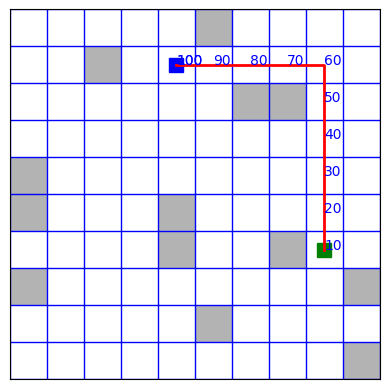

For Uniform Cost Search Algorithm:

To recharge press 1: 1
Recharged Successfully
Solution Path: [(1, 4), (1, 4), (2, 4), (3, 4), (3, 5), (3, 6), (3, 7), (4, 7), (5, 7), (5, 8), (6, 8)]


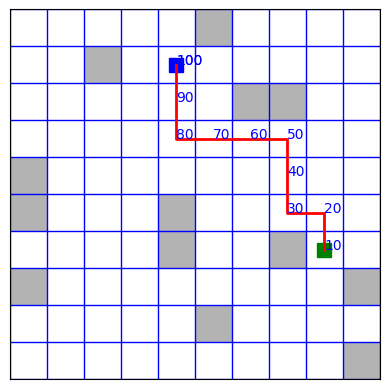

no difference


In [200]:
environment = Environment()
agent = Agent(environment)
print("For A* Search Algorithm:\n")
solution_path = agent.a_star_search()
print("Solution Path:", solution_path)
visualize_grid_and_path(environment.getGrid(), solution_path)
print("For Uniform Cost Search Algorithm:\n")
solution_path = agent.uniform_cost_search()
print("Solution Path:", solution_path)
visualize_grid_and_path(environment.getGrid(), solution_path)
agent.compare()